# Bike Sharing Demand Prediction

## Problem Statement

BoomBikes, a prominent bikeSharing-sharing provider in the United States, has recently experienced significant declines in revenue due to the ongoing COVID-19 pandemic. As the company struggles to remain sustainable in the current market conditions, they are now focused on preparing a strategic business plan to quickly accelerate revenue once the lockdown is lifted and the economy begins to recover.

In order to achieve this, BoomBikes aims to understand the factors influencing the demand for shared bikes among people after the quarantine restrictions are lifted. By understanding these factors, BoomBikes can better anticipate and meet the needs of their customers, stand out in the competitive market, and maximize profits.

To accomplish this, BoomBikes has hired a consulting firm to analyze a large dataset that contains information on daily bikeSharing demand across the American market, along with various factors that may influence this demand. The main objectives of this analysis are to:

- Identify the significant variables that predict the demand for shared bikes.
- Assess how well these variables explain the variations in bikeSharing demand.

## Business Goal

The primary goal of this analysis is to develop a predictive model that accurately estimates the demand for shared bikes based on the available independent variables. The insights gained from this model will help BoomBikes' management team understand how different factors affect bikeSharing demand. With this knowledge, they can strategically adjust their business operations to better cater to customer needs and thrive in the market. Moreover, this model will serve as a valuable tool for understanding demand dynamics in new markets that BoomBikes may enter in the future.
a new market. 



## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bikeSharing sharing company's data set

In [438]:
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

##### lets Ignore the Warnings

In [440]:
import warnings
warnings.filterwarnings('ignore')

##### Lets Read the CSV

In [442]:
bikeSharing = pd.read_csv("day.csv")

In [443]:
#lets understand the information present in the csv
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [444]:
bikeSharing.shape

(730, 16)

##### There are 730 rows and 16 columns

### <span style="color:green"><strong>1.1 Data quality check</strong></span>

In [447]:
print("Rows and columns present in the dataset are:", bikeSharing.shape ,"\n")
bikeSharing.info()

Rows and columns present in the dataset are: (730, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [448]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [449]:
# Creating a copy of original dataframe for duplicate check
bikeSharingD = bikeSharing

# Checking for duplicates and dropping the entire duplicate row if any
bikeSharingD.drop_duplicates(subset=None, inplace=True)
print(bikeSharingD.shape)
print(bikeSharing.shape)

(730, 16)
(730, 16)


#### Both original and duplicate instance share the same shape even after dropping duplicates hence we can conclude there no duplicate in our original dataset

### <span style="color:green"><strong>1.2 dropping redundant columns</strong></span>

<function matplotlib.pyplot.show(close=None, block=None)>

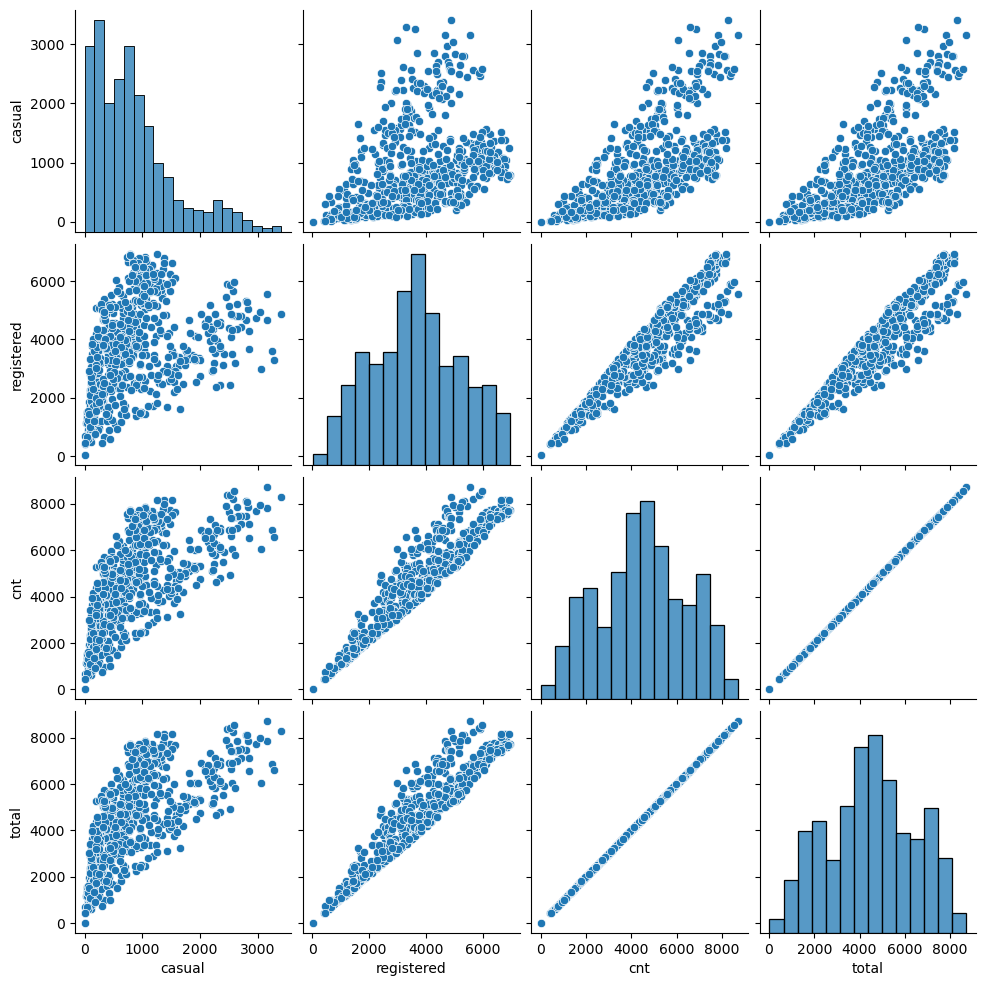

In [452]:
bike_cnt = bikeSharing[['casual','registered','cnt']]
# Creating a column whch will show the value of casual + registered
bike_cnt['total'] = bike_cnt['casual'] + bike_cnt ['registered']
sns.pairplot(bike_cnt)
plt.show

### Checking the relationship between casual, registered and cnt column and plotting heatmap

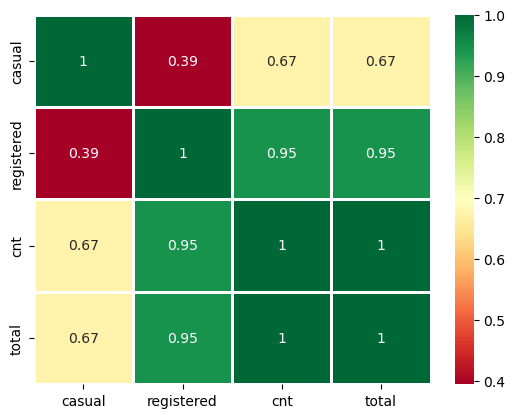

In [454]:
ax= sns.heatmap(bike_cnt.corr(), annot = True, cmap="RdYlGn",linewidth =1)

- instant: It is only an index value
- dteday: This has the date, Since we already have separate columns for 'year' & 'month' we could perform analysis without this column
- casual & registered: Both these columns contains the count of bikeSharing booked by different categories of customers. From the pairplot as well as the correlation heatmap, we can concur that total bike value 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.
##### ropping the unwanted columns

In [456]:
bikeSharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bikeSharing.shape

(730, 12)

---

## Step 2: Encoding & Visualizing the data

### <span style="color:green"><strong>2.1 Encoding Categorical columns</strong></span>

#### Converting season, mnth,weathersit and weekday to categorical columns

- season: converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter
- mnth: converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
- weathersit: converting weathersit values as 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
- weekday: converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat

#### Converting Months(mnth)

In [463]:
bikeSharing.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bikeSharing.mnth.value_counts(normalize=True)

mnth
Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: proportion, dtype: float64

#### Converting weather (weathersit)

In [465]:
bikeSharing.weathersit.replace((1,2,3,4), ('Clear','Mist_Cloudy','Light_Rain_Snow','Heavy_Rain'), inplace=True)
bikeSharing.weathersit.value_counts(normalize=True)

weathersit
Clear              0.634247
Mist_Cloudy        0.336986
Light_Rain_Snow    0.028767
Name: proportion, dtype: float64

#### Converting Season (season)

In [467]:
bikeSharing.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
bikeSharing.season.value_counts(normalize=True)

season
Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: proportion, dtype: float64

#### Converting days(weekday)

In [469]:
bikeSharing.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bikeSharing.weekday.value_counts(normalize=True)

weekday
Saturday     0.143836
Sunday       0.143836
Monday       0.143836
Tuesday      0.142466
Thursday     0.142466
Friday       0.142466
Wednesday    0.141096
Name: proportion, dtype: float64

### <span style="color:green"><strong>2.2 Categorical Variable Analysis</strong></span>

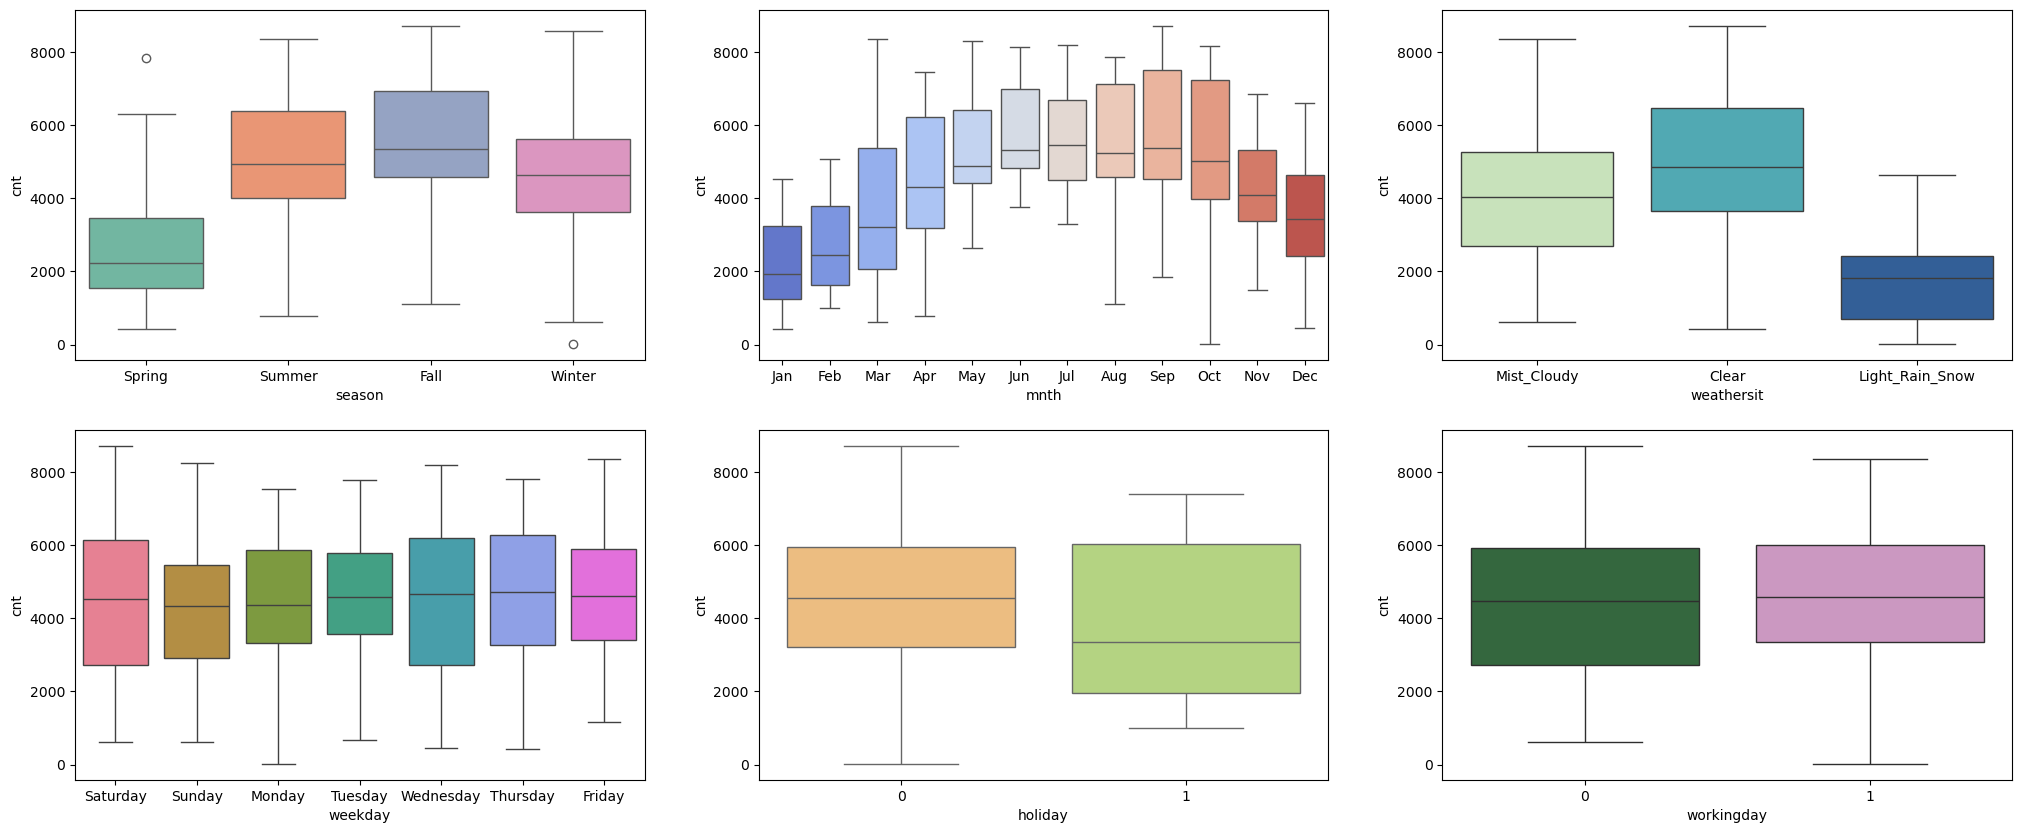

In [471]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and subplots
plt.figure(figsize=(25, 10))

# First subplot
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=bikeSharing, palette="Set2")  # Use Set2 palette

# Second subplot
plt.subplot(2, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=bikeSharing, palette="coolwarm")  # Use coolwarm palette

# Third subplot
plt.subplot(2, 3, 3)
sns.boxplot(x='weathersit', y='cnt', data=bikeSharing, palette="YlGnBu")  # Use YlGnBu palette

# Fourth subplot
plt.subplot(2, 3, 4)
sns.boxplot(x='weekday', y='cnt', data=bikeSharing, palette="husl")  # Use husl palette

# Fifth subplot
plt.subplot(2, 3, 5)
sns.boxplot(x='holiday', y='cnt', data=bikeSharing, palette="RdYlGn")  # Use RdYlGn palette

# Sixth subplot
plt.subplot(2, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=bikeSharing, palette="cubehelix")  # Use cubehelix palette

# Show the plot
plt.show()

- **Season vs Bike Count**
    - Summer and Fall: These seasons see the highest median bike counts, indicating more bike rentals during these periods.
    - Spring: Has the lowest median and range in bike counts, suggesting fewer rentals in this season.
- **Month vs Bike Count**
    - June to September: These months show higher median bike counts, which aligns with the summer season.
    - January and December: Lower bike counts, consistent with the colder winter months.
- **Weather Situation vs Bike Count**
    - Clear Weather: Predictably, bike rentals are higher in clear weather.
    - Mist/Cloudy: There is a slight decrease in the median bike count, indicating that overcast weather might reduce rentals somewhat.
    - Light Rain/Snow: This condition significantly reduces the bike count, suggesting that adverse weather conditions strongly discourage bike rentals.
- **Weekday vs Bike Count**
    - Weekdays (Monday to Friday): The median bike count is fairly consistent across the workweek, with a slight dip on Tuesday.
    - Weekends (Saturday and Sunday): Slightly higher bike counts on Saturdays and Sundays compared to weekdays, indicating more leisure bike usage.
- **Holiday vs Bike Count**
    - Non-Holidays: These days have a higher median bike count, likely due to regular commuting.
    - Holidays: The median count is slightly lower, suggesting reduced bike rentals when people aren't commuting to work.
- **Working Day vs Bike Count**
    - Working Days: The bike count is fairly consistent, likely due to regular commutes.
    - Non-Working Days: Slightly lower median, indicating fewer rentals on days off, which might be due to a reduction in commuting-related bike usage.

In [473]:
#fucntion to check the statistics of categorical variables
# def categorical_stats(col):
#     cat_df = bikeSharing.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
#     cat_df['sum_perc']=cat_df['sum']/bikeSharing.cnt.sum()*100
#     cat_df['count_perc']=cat_df['count']/bikeSharing.cnt.count()*100
#     return round(cat_df,2)
def categorical_stats(col):
    cat_df = bikeSharing.groupby([col, 'yr'])['cnt'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)
    cat_df['sum_perc'] = cat_df['sum'] / bikeSharing.cnt.sum() * 100
    cat_df['count_perc'] = cat_df['count'] / bikeSharing.cnt.count() * 100
    return round(cat_df, 2)
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [474]:
print("\nCategorical Stats for 'season':\n")
print(categorical_stats('season'))
print("\n")
# Print categorical statistics for 'holiday'
print("\nCategorical Stats for 'holiday':\n")
print(categorical_stats('holiday'))
print("\n")

# Print categorical statistics for 'mnth'
print("\nCategorical Stats for 'mnth':\n")
print(categorical_stats('mnth'))
print("\n")

# Print categorical statistics for 'weathersit'
print("\nCategorical Stats for 'weathersit':\n")
print(categorical_stats('weathersit'))
print("\n")

# Print categorical statistics for 'weekday'
print("\nCategorical Stats for 'weekday':\n")
print(categorical_stats('weekday'))
print("\n")

# Print categorical statistics for 'workingday'
print("\nCategorical Stats for 'workingday':\n")
print(categorical_stats('workingday'))
print("\n")



Categorical Stats for 'season':

              sum     mean  count  sum_perc  count_perc
season yr                                              
Fall   1   641479  6824.24     94     19.49       12.88
Summer 1   571273  6209.49     92     17.36       12.60
Winter 1   515476  5791.87     89     15.66       12.19
Fall   0   419650  4464.36     94     12.75       12.88
Summer 0   347316  3775.17     92     10.55       12.60
Winter 0   326137  3664.46     89      9.91       12.19
Spring 1   319514  3550.16     90      9.71       12.33
       0   150000  1666.67     90      4.56       12.33



Categorical Stats for 'holiday':

                sum     mean  count  sum_perc  count_perc
holiday yr                                               
0       1   1999329  5647.82    354     60.75       48.49
        0   1213081  3417.13    355     36.86       48.63
1       1     48413  4401.18     11      1.47        1.51
        0     30022  3002.20     10      0.91        1.37



Categorical Stats 

- **Season**
    - Fall (19.49% in 2019, 12.75% in 2018): The highest bike rentals occur during the Fall season, making it the peak period for bike-sharing, especially in 2019.
    - Summer (17.36% in 2019, 10.55% in 2018): Summer follows closely, indicating another high-demand season with a noticeable increase in rentals in 2019.
    - Winter (15.66% in 2019, 9.91% in 2018): Winter also sees a significant number of rentals, though slightly lower than Fall and Summer.
    - Spring (9.71% in 2019, 4.56% in 2018): Spring has the lowest bike rentals among the seasons, with a slight increase in 2019.

- **Holiday**
    - Non-holiday (60.75% in 2019, 36.86% in 2018): The majority of bike rentals occur on non-holidays, indicating that regular days contribute more to bike rentals.
    - Holiday (1.47% in 2019, 0.91% in 2018): Bike rentals on holidays are significantly lower, with very few occurrences in both years.

- **Month**
    - September (6.64% in 2019, 3.87% in 2018): September in 2019 had the highest bike rentals, indicating a peak in bike-sharing demand.
    - August (6.52% in 2019, 4.15% in 2018): August follows closely behind, showing consistent demand in both years.
    - July (6.19% in 2019, 4.29% in 2018): July also sees high bike rentals, though slightly lower than August and September.
    - June (6.16% in 2019, 4.36% in 2018): June marks the beginning of the peak period for bike rentals, with consistent demand in both years.
    - Other Months: The remaining months, particularly in 2018, show lower bike rental activity, with January and February having the least demand.

- **Weather Situation**
    - Clear (43.24% in 2019, 25.38% in 2018): The majority of bike rentals occur in clear weather conditions, making it the most favorable condition for biking.
    - Mist/Cloudy (18.60% in 2019, 11.64% in 2018): Bike rentals decrease under misty or cloudy conditions but still represent a significant portion of total rentals.
    - Light Rain/Snow (0.39% in 2019, 0.76% in 2018): Adverse weather conditions like light rain or snow have the lowest bike rentals, indicating a strong preference for clear weather.

- **Weekday**
    - Thursday (9.45% in 2019, 5.30% in 2018): Thursday records the highest bike rentals during weekdays in 2019, marking it as a peak day for bike usage.
    - Friday (9.29% in 2019, 5.53% in 2018): Friday follows closely behind, showing consistent demand, particularly in 2019.
    - Wednesday (9.18% in 2019, 5.14% in 2018): Wednesday sees a slightly lower demand compared to Thursday and Friday, but still a significant amount of bike rentals.
    - Other Weekdays: The remaining weekdays have a balanced distribution of bike rentals, with no significant spikes.

- **Working Day**
    - Working Day (43.58% in 2019, 26.02% in 2018): The majority of bike rentals occur on working days, highlighting that bike-sharing is primarily used for commuting purposes.
    - Non-Working Day (18.64% in 2019, 11.76% in 2018): Bike rentals are lower on non-working days, but they still represent a significant portion of total rentals, particularly in 2019.

 other non-commuting uses.


#### Bike Rental demand has gone up from 2018 to 2019

### <span style="color:green"><strong>2.3 Numerical Variable Analysis</strong></span>

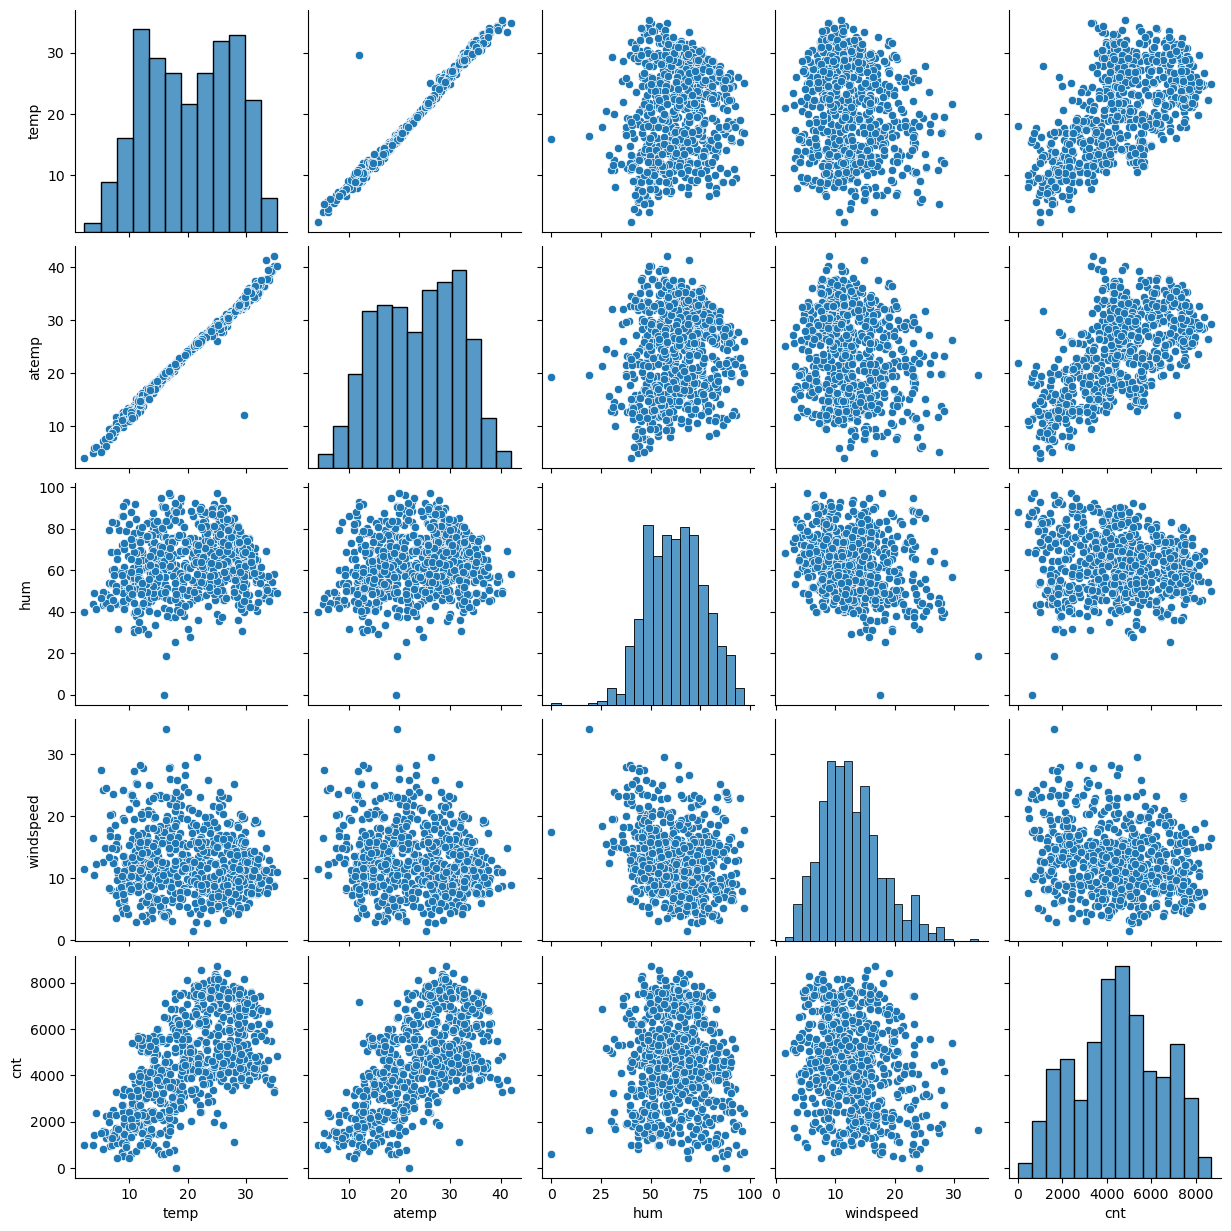

In [478]:
bike_num = bikeSharing[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

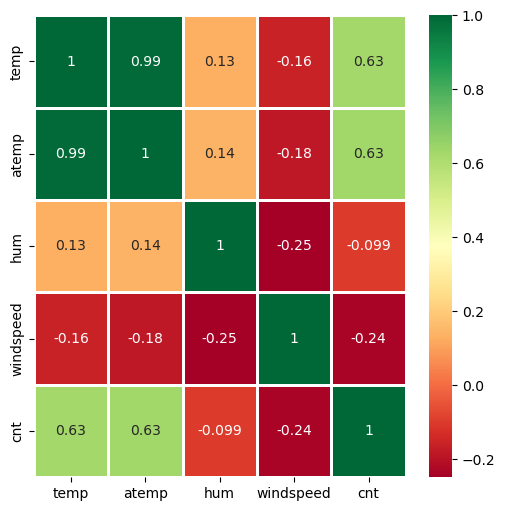

In [479]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn",linewidth =1)

### Analysis of Pair Plot

- **Temperature (temp and atemp)**
    - **High Correlation Between temp and atemp:** The scatter plot shows a strong positive correlation between `temp` (actual temperature) and `atemp` (feels-like temperature). This indicates that these two variables move closely together, as expected.
    - **Relationship with cnt (count):** Both `temp` and `atemp` show a positive correlation with `cnt` (bike rentals). As temperature increases, the number of bike rentals also tends to increase, suggesting that more favorable weather encourages bike usage.

- **Humidity (hum)**
    - **No Strong Correlation with cnt:** The scatter plot between `hum` and `cnt` does not show a clear linear relationship, indicating that humidity does not have a strong direct impact on the number of bike rentals.
    - **Distribution of Humidity:** The histogram for `hum` shows that the data is relatively uniformly distributed, with a slight concentration in the 60-80 range.

- **Windspeed**
    - **No Strong Correlation with cnt:** Similar to humidity, windspeed does not show a strong correlation with bike rentals. The scatter plot suggests that windspeed might not significantly impact bike usage.
    - **Windspeed Distribution:** The histogram shows that most windspeed values are concentrated at lower speeds, with very few occurrences at higher wind speeds.

- **cnt (Count of Bike Rentals)**
    - **Overall Distribution:** The histogram for `cnt` shows that bike rentals are fairly normally distributed, with a slight skew towards the lower end. This suggests that while most days see moderate bike rentals, there are fewer days with extremely high or low rentals.
    - **Relationship with Weather Conditions:** The pair plots show that weather conditions like temperature have a more significant impact on bike rentals compared to other factors like humidity and windspeed.

### Key Takeaways
- Temperature is a significant factor influencing bike rentals, with warmer temperatures leading to higher rentals.
- Humidity and windspeed do not show a strong direct impact on bike rentals, although they might still have some indirect effects.
- The data suggests that bike rentals are more likely to increase with favorable weather conditions.
-  There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables


## Step 3: Data Preparation

### <span style="color:green"><strong>3.1 Dummy Variable Creation</strong></span>

#### We are dropping 1 column accross all categorical variables as per the statistics we need only n-1 columns

In [484]:
season = pd.get_dummies(bikeSharing['season'], drop_first=False).astype('int8')

# Explicitly drop the 'Spring' column to use it as the baseline
season = season.drop(columns=['Spring'])
season.head(3)

,Fall,Summer,Winter
0,0,0,0
1,0,0,0
2,0,0,0


In [485]:
weather = pd.get_dummies(bikeSharing['weathersit'], drop_first = True).astype('int8')
weather.head(3)

,Light_Rain_Snow,Mist_Cloudy
0,0,1
1,0,1
2,0,0


In [486]:
month = pd.get_dummies(bikeSharing['mnth'], drop_first = True).astype('int8')
month.head(3)


,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [487]:
weekday = pd.get_dummies(bikeSharing['weekday'], drop_first = True).astype('int8')
weekday.head(3)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0


### <span style="color:green"><strong>3.2 Merging the Dataframes</strong></span>

In [489]:
bikeSharingNew = pd.concat([bikeSharing,season,month,weather,weekday], axis = 1)
bikeSharingNew.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_Rain_Snow,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,Jan,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,Spring,0,Jan,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0


In [490]:
bikeSharingNew.shape

(730, 34)

In [491]:
bikeSharingNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   hum              730 non-null    float64
 10  windspeed        730 non-null    float64
 11  cnt              730 non-null    int64  
 12  Fall             730 non-null    int8   
 13  Summer           730 non-null    int8   
 14  Winter           730 non-null    int8   
 15  Aug              730 non-null    int8   
 16  Dec              730 non-null    int8   
 17  Feb             

#### Deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data

In [493]:
bikeSharingNew.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bikeSharingNew.shape

(730, 30)

In [494]:
bikeSharingNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   Fall             730 non-null    int8   
 9   Summer           730 non-null    int8   
 10  Winter           730 non-null    int8   
 11  Aug              730 non-null    int8   
 12  Dec              730 non-null    int8   
 13  Feb              730 non-null    int8   
 14  Jan              730 non-null    int8   
 15  Jul              730 non-null    int8   
 16  Jun              730 non-null    int8   
 17  Mar             

##### All the 30 columns are now as numeric value. The dataframe is ready now for splitting into Train & Test dataframes

## Step 4: Splitting the data into Train & Test Dataset

### <span style="color:green"><strong>4.1. Train & Test Split</strong></span>

In [498]:
np.random.seed(0)
bikeSharingTrain, bikeSharingTest = train_test_split(bikeSharingNew, train_size = 0.7, random_state = 333)

In [499]:
bikeSharingTrain.shape

(510, 30)

In [500]:
bikeSharingTrain.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Fall,Summer,...,Oct,Sep,Light_Rain_Snow,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.684314,20.218078,23.590696,62.340743,12.771365,4494.103922,0.262745,0.245098,...,0.084314,0.082353,0.025490,0.343137,0.139216,0.150980,0.141176,0.129412,0.141176,0.150980
std,0.500487,0.151726,0.465245,7.500110,8.138271,14.418728,5.205888,1948.315655,0.440557,0.430568,...,0.278131,0.275172,0.157763,0.475223,0.346511,0.358381,0.348545,0.335985,0.348545,0.358381
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717923,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327088,72.958300,15.624869,5962.750000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [501]:
bikeSharingTest.shape

(220, 30)

In [502]:
bikeSharingTest.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Fall,Summer,...,Oct,Sep,Light_Rain_Snow,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,20.553817,24.040727,63.749086,12.745665,4540.236364,0.245455,0.268182,...,0.086364,0.081818,0.036364,0.322727,0.154545,0.127273,0.150000,0.172727,0.145455,0.118182
std,0.501120,0.198531,0.466833,7.533926,8.188064,13.790510,5.184271,1911.199159,0.431338,0.444023,...,0.281541,0.274713,0.187620,0.468586,0.362295,0.334038,0.357886,0.378873,0.353363,0.323559
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Based on the 80% - 20% split between train and test dataset we have 584 rows in train dataset and 146 in test dataset

### <span style="color:green"><strong>4.2 Rescalling bike_train dataframe</strong></span>

In [505]:
scaler = MinMaxScaler()

In [506]:
bikeSharingTrain.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Fall,Summer,...,Oct,Sep,Light_Rain_Snow,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,16.126653,19.5698,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,31.638347,35.1646,55.0833,10.500039,4266,1,0,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,14.862500,18.4969,83.8750,6.749714,3786,0,0,...,0,0,0,1,0,0,1,0,0,0


In [507]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bikeSharingTrain[num_vars] = scaler.fit_transform(bikeSharingTrain[num_vars])

In [508]:
bikeSharingTrain.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Fall,Summer,...,Oct,Sep,Light_Rain_Snow,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,1,0,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,0,0,1,0,0,0


### <span style="color:green"><strong>4.3 Checking Correlation Coefficient</strong></span>

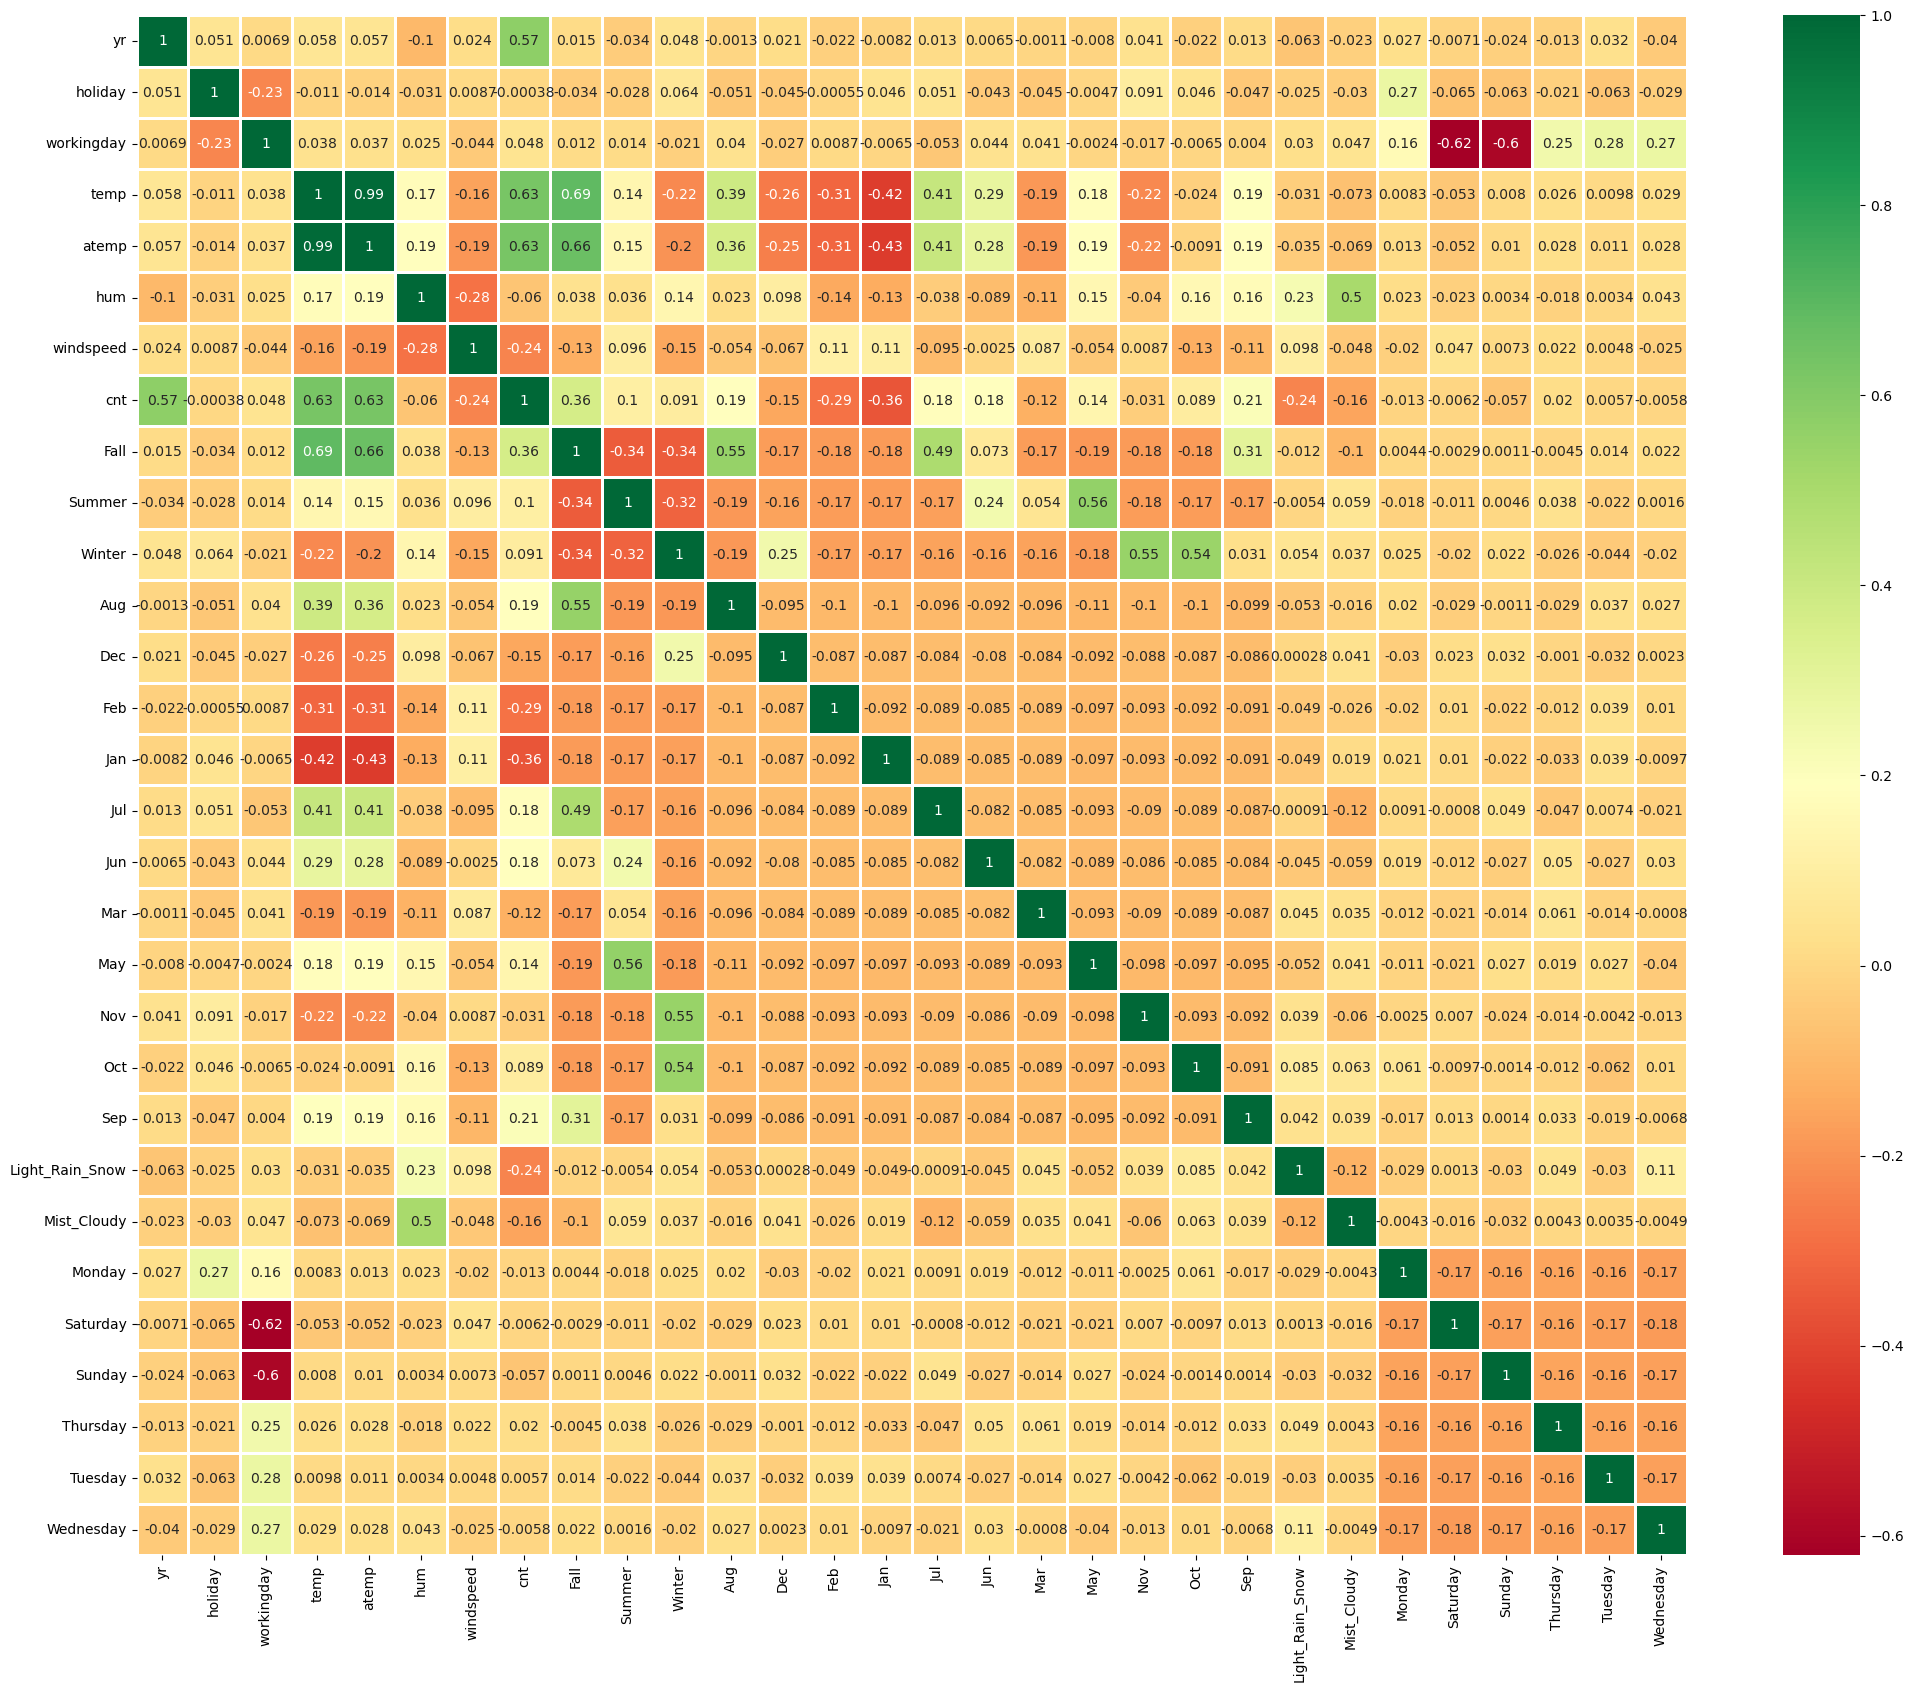

In [510]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(bikeSharingTrain.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

- There is multi-colinearity between the variables. We need to consider the factors when developing the model.

    - temp and atemp has very high correlation value of 0.99. This suggest, we can use only one of these two variables
    - workingday variable has high negative correlation with Sat & Sun (where workingday =0)
    - Spring is negatively correlated with cnt
    - temp, atemp and yr has strong correlation with cnt
    - misty weather and humidity has correlation
    - various months and corresponding weather has correlation

## Step 5: Building the Linear Model
### <span style="color:green"><strong>5.1 Dividing into X_train and y_train</strong></span>

In [513]:
y_train = bikeSharingTrain.pop('cnt')
X_train = bikeSharingTrain

## 5.2 RFE
- Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [515]:
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=13)  # Correct way to specify the number of features
rfe = rfe.fit(X_train, y_train)

In [516]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Fall', False, 2),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 15),
 ('Dec', False, 7),
 ('Feb', False, 11),
 ('Jan', False, 10),
 ('Jul', False, 6),
 ('Jun', False, 14),
 ('Mar', False, 3),
 ('May', False, 9),
 ('Nov', False, 5),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Light_Rain_Snow', True, 1),
 ('Mist_Cloudy', False, 4),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 16),
 ('Tuesday', False, 12),
 ('Wednesday', False, 17)]

In [517]:
selected_columns = X_train.columns[rfe.support_]

# Convert the Index object to a list
selected_columns = selected_columns.tolist()

# Append the 'Mist_Cloudy' column
selected_columns.append('Mist_Cloudy')

# Now you can use the final selected columns
finalCol = selected_columns
finalCol

['yr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'Summer',
 'Winter',
 'Sep',
 'Light_Rain_Snow',
 'Saturday',
 'Sunday',
 'Mist_Cloudy']

In [518]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]


Index(['Fall', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Mist_Cloudy', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [519]:
X_train_rfe = X_train[finalCol]

### <span style="color:green"><strong>5.3 Manual Model Development using statsmodel</strong></span>

In [521]:
#VIF calculation function
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

#### <span style="color:green">5.3.1 Model 1</span>

In [523]:
calculateVIF(X_train_rfe)

,Features,VIF
4,atemp,52.63
3,temp,52.36
2,workingday,32.15
11,Saturday,7.89
12,Sunday,7.62
1,holiday,2.11
5,hum,1.91
13,Mist_Cloudy,1.57
8,Winter,1.27
6,windspeed,1.24


In [524]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.41e-183
Time:                        15:48:39   Log-Likelihood:                 496.28
No. Observations:                 510   AIC:                            -964.6
Df Residuals:                     496   BIC:                            -905.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1761      0.023     

#### <span style="color:green">5.3.2 Model 2</span>

##### Both temp and atemp has high VIF but atemp has high p-value additionally. We will go ahead with dropping atemp from the equation

In [527]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,workingday,31.92
10,Saturday,7.83
11,Sunday,7.56
1,holiday,2.10
4,hum,1.90
12,Mist_Cloudy,1.57
3,temp,1.25
7,Winter,1.24
9,Light_Rain_Snow,1.22
5,windspeed,1.20


In [528]:
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.66e-184
Time:                        15:48:39   Log-Likelihood:                 496.27
No. Observations:                 510   AIC:                            -966.5
Df Residuals:                     497   BIC:                            -911.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1763      0.023     

#### <span style="color:green">5.3.3 Model 3</span>

#### As Holiday has the highest p-value, we will remove the variable next

In [531]:
X_train_new2 = X_train_new.drop(['holiday'], axis = 1)
#Run the function to calculate VIF for the new model
calculateVIF(X_train_new2)

,Features,VIF
3,hum,25.64
1,workingday,15.87
2,temp,8.05
4,windspeed,5.38
9,Saturday,4.29
10,Sunday,4.15
11,Mist_Cloudy,2.23
0,yr,2.01
6,Winter,1.62
5,Summer,1.57


In [532]:
X_train_lm3 = sm.add_constant(X_train_new2)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.66e-184
Time:                        15:48:39   Log-Likelihood:                 496.27
No. Observations:                 510   AIC:                            -966.5
Df Residuals:                     497   BIC:                            -911.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1842      0.039     

#### <span style="color:green">5.3.4 Model 4</span>

#### As hum has the highest VIF value, we will remove the variable next , we cant remove temp beacause its highly correlated with other column

In [535]:
X_train_new3 = X_train_new2.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new3)

,Features,VIF
1,workingday,9.10
2,temp,6.61
3,windspeed,5.37
8,Saturday,2.74
9,Sunday,2.69
0,yr,2.01
10,Mist_Cloudy,1.57
4,Summer,1.56
5,Winter,1.49
6,Sep,1.20


In [536]:
X_train_lm4 = sm.add_constant(X_train_new3)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.24e-180
Time:                        15:48:39   Log-Likelihood:                 482.63
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     498   BIC:                            -890.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0701      0.033     

#### <span style="color:green">5.3.5 Model 5</span>

#### Next we will remove Sunday due to high p-value

In [539]:
X_train_new4 = X_train_new3.drop(['Sunday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new4)

,Features,VIF
2,temp,4.71
1,workingday,4.03
3,windspeed,4.03
0,yr,2.00
8,Saturday,1.65
4,Summer,1.55
9,Mist_Cloudy,1.53
5,Winter,1.38
6,Sep,1.20
7,Light_Rain_Snow,1.07


In [540]:
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.48e-181
Time:                        15:48:40   Log-Likelihood:                 482.51
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     499   BIC:                            -896.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0828      0.020     

### For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number)

#### <span style="color:green">Step 6: Final Model Interpretation</span>

- **Hypothesis Testing States that:**
    - H0: `B1 = B2 = ... = Bn = 0`
    - H1: `at least one Bi ≠ 0`
 Bi!=0

In [544]:

# Get the coefficients
coefficients = lr5.params

# Create a DataFrame to list feature names with their coefficients
coef_df = pd.DataFrame({
    'Feature': coefficients.index,
    'Coefficient': coefficients.values
})

# Display the DataFrame sorted by the absolute value of the coefficients
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print(coef_df)


            Feature  Coefficient
3              temp     0.564438
1                yr     0.230252
6            Winter     0.129186
7               Sep     0.094832
0             const     0.082768
5            Summer     0.082300
9          Saturday     0.057838
2        workingday     0.043963
10      Mist_Cloudy    -0.074921
4         windspeed    -0.154241
8   Light_Rain_Snow    -0.307082


#### From the lr6 model summary, it is evident that all our coefficients are not equal to zero, which means we REJECT the NULL HYPOTHESIS

### <span style="color:green">F-Statistics </span>

#### F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.

### Model Summary

- **F-statistic**: 233.6
- **Prob (F-statistic)**: 4.48e-181

The high F-statistic and extremely low probability indicate that the model is statistically significant, meaning that the model as a whole is a good fit for the data.


### Best Fit Line

The linear regression model can be represented by the following equation:

<div style="font-size: 20px;">
$$
\text{Predicted Value} = 0.564 \times \text{temp} + 0.230 \times \text{yr} + 0.129 \times \text{Winter} + 0.095 \times \text{Sep} + 0.083 \times \text{const} + 0.082 \times \text{Summer} + 0.058 \times \text{Saturday} + 0.044 \times \text{workingday} - 0.075 \times \text{Mist\_Cloudy} - 0.154 \times \text{windspeed} - 0.307 \times \text{Light\_Rain\_Snow}
$$
</div>

### Interpretation

- **temp** has the largest positive impact on the predicted value, with a coefficient of 0.564.
- **Light_Rain_Snow** has the most significant negative impact, with a coefficient of -0.307.
- Other factors like **yr**, **Winter**, **Sep**, and **Summer** also contribute positively to the model, while **windspeed** and **Mist_Cloudy** have negative effects.
ve effects.
ve effects.
ve effects.
ve effects.


### Interpretation of Coefficients

- **const**: The constant value of `0.082768` indicates that, in the absence of all other predictor variables (i.e., when \( x_1, x_2, \ldots, x_n = 0 \)), the bike rental can still increase by `0.082768` units.

- **yr**: A coefficient value of `0.230252` indicates that a unit increase in the `yr` variable increases the bike hire numbers by `0.230252` units.

- **workingday**: A coefficient value of `0.043963` indicates that a unit increase in the `workingday` variable increases the bike hire numbers by `0.043963` units.

- **temp**: A coefficient value of `0.564438` indicates that a unit increase in the `temp` variable increases the bike hire numbers by `0.564438` units.

- **windspeed**: A coefficient value of `-0.154241` indicates that a unit increase in the `windspeed` variable decreases the bike hire numbers by `0.154241` units.

- **W2_Summer**: A coefficient value of `0.082300` indicates that a unit increase in the `W2_Summer` variable increases the bike hire numbers by `0.082300` units.

- **W4_Winter**: A coefficient value of `0.129186` indicates that a unit increase in the `W4_Winter` variable increases the bike hire numbers by `0.129186` units.

- **Sep**: A coefficient value of `0.094832` indicates that a unit increase in the `Sep` variable increases the bike hire numbers by `0.094832` units.

- **Light_rainsnow**: A coefficient value of `-0.307082` indicates that a unit increase in the `Light_rainsnow` variable decreases the bike hire numbers by `0.307082` units.

- **Misty**: A coefficient value of `-0.074921` indicates that a unit increase in the `Misty` weather variable decreases the bike hire numbers by `0.074921` units.

- **Saturday**: A coefficient value of `0.057838` indicates that a unit increase in the `Saturday` variable increases the bike hire numbers by `0.057838` units.


#### <span style="color:green">Step 7: Model Validation</span>

#### Validating the assumption of Linear Regression Model :
- Homoscedasticity
- Absence of Multicollinearity
- Normality of Errors

### Homoscedasticity

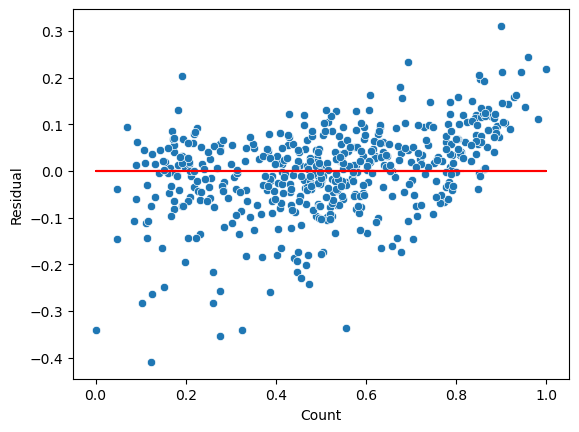

In [554]:
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train - y_train_pred

# Scatter plot of actual vs residuals
sns.scatterplot(x=y_train, y=residual)

# Adding a horizontal line at residual = 0
plt.plot(y_train, [0]*len(y_train), '-r')

# Adding labels
plt.xlabel('Count')
plt.ylabel('Residual')

# Display the plot
plt.show()


#### There is no visible pattern in residual values, thus homoscedacity is well preserved

### Absence of Multicolinearity

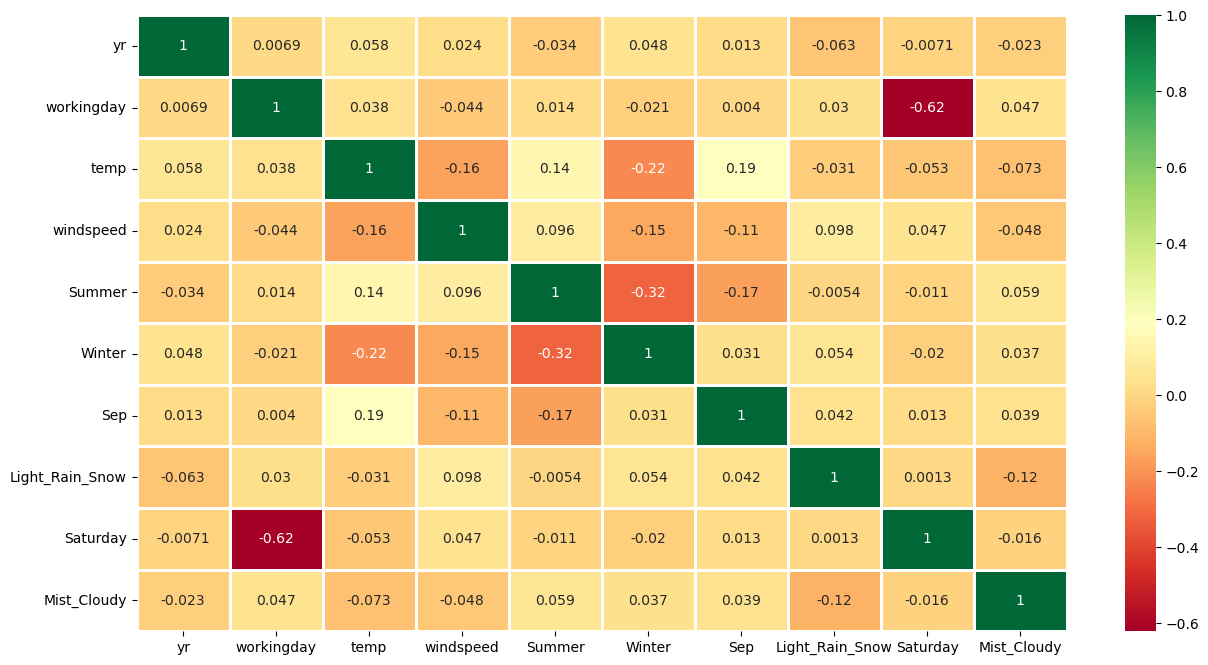

In [557]:

plt.figure(figsize=(15,8))
sns.heatmap(X_train_new4.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [558]:
calculateVIF(X_train_new4)

,Features,VIF
2,temp,4.71
1,workingday,4.03
3,windspeed,4.03
0,yr,2.00
8,Saturday,1.65
4,Summer,1.55
9,Mist_Cloudy,1.53
5,Winter,1.38
6,Sep,1.20
7,Light_Rain_Snow,1.07


#### All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.

### Normality of error

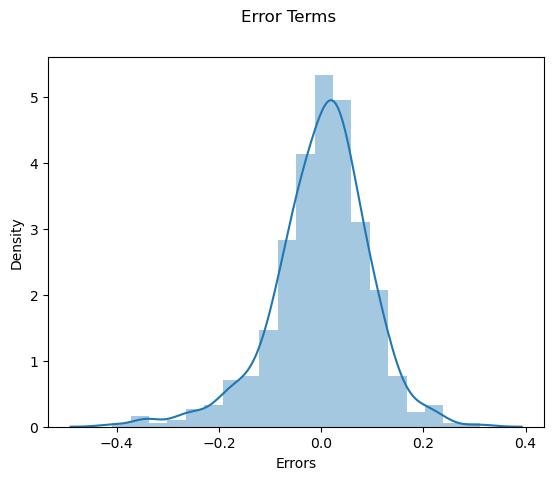

In [561]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

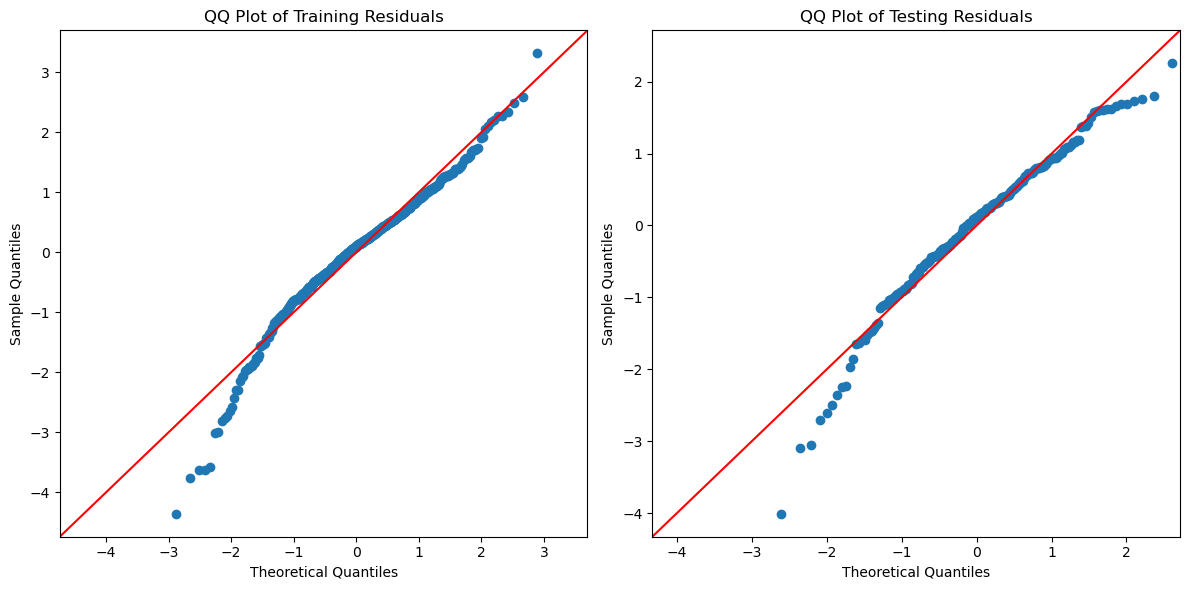

In [562]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# QQ plot for training residuals
sm.qqplot((y_train - y_train_pred), fit=True, line='45', ax=axes[0])
axes[0].set_title('QQ Plot of Training Residuals')
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Sample Quantiles')

# QQ plot for testing residuals
sm.qqplot((y_test - y_test_pred), fit=True, line='45', ax=axes[1])
axes[1].set_title('QQ Plot of Testing Residuals')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Based on the histogram, we can conclude that error terms are following a normal distribution

### <span style="color:green">Step 8: Making Predictions using final model</span>

Applying the MinMax scaling on the test sets
  - Note - we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data.In other words, we want to prevent the information leak from train to test dataset.

In [566]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bikeSharingTest[num_vars] = scaler.transform(bikeSharingTest[num_vars])
bikeSharingTest.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Fall,Summer,...,Oct,Sep,Light_Rain_Snow,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,1,0,0,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,1,0,...,0,0,0,0,0,0,1,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,0,0,0,0,1,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,0,1,0


In [567]:
bikeSharingTest.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Fall,Summer,...,Oct,Sep,Light_Rain_Snow,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,0.550981,0.527344,0.662328,0.346015,0.519816,0.245455,0.268182,...,0.086364,0.081818,0.036364,0.322727,0.154545,0.127273,0.150000,0.172727,0.145455,0.118182
std,0.501120,0.198531,0.466833,0.228967,0.214959,0.143278,0.159517,0.219880,0.431338,0.444023,...,0.281541,0.274713,0.187620,0.468586,0.362295,0.334038,0.357886,0.378873,0.353363,0.323559
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### <span style="color:green">8.2 Dividing X_test and y_test</span>

In [569]:
y_test = bikeSharingTest.pop('cnt')
X_test = bikeSharingTest

In [570]:
col1=X_train_new4.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 22 to 483
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            220 non-null    float64
 1   yr               220 non-null    int64  
 2   workingday       220 non-null    int64  
 3   temp             220 non-null    float64
 4   windspeed        220 non-null    float64
 5   Summer           220 non-null    int8   
 6   Winter           220 non-null    int8   
 7   Sep              220 non-null    int8   
 8   Light_Rain_Snow  220 non-null    int8   
 9   Saturday         220 non-null    int8   
 10  Mist_Cloudy      220 non-null    int8   
dtypes: float64(3), int64(2), int8(6)
memory usage: 11.6 KB


In [664]:
y_pred = lr5.predict(X_test_lm6)

#### <span style="color:green">Step 9: Model Evaluation</span>

#### R2 Value Calculation for bike_test dataframe

In [574]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8206

#### Adjusted R2 Value Calculation for bike_test dataframe

In [576]:
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.812

In [577]:
# Predicting on the training set
y_train_pred = lr5.predict(X_train_lm5)

# Calculate R-squared for training set
r2_train = round(r2_score(y_train, y_train_pred), 4)

# Calculate Adjusted R-squared for training set
n_train = X_train_lm5.shape[0]  # number of observations in training set
p_train = X_train_lm5.shape[1]  # number of predictors in training set

adjusted_r2_train = round(1 - (1-r2_train) * (n_train-1)/(n_train-p_train-1), 4)
print("r2 = " + str(r2_train) + ", adj r2 = " + str(adjusted_r2_train))


r2 = 0.824, adj r2 = 0.8201


In [578]:
y_test_pred = lr5.predict(X_test_lm6)

# Calculate R-squared for test set
r2_test = round(r2_score(y_test, y_test_pred), 4)

# Calculate Adjusted R-squared for test set
n_test = X_test_lm6.shape[0]  # number of observations in test set
p_test = X_test_lm6.shape[1]  # number of predictors in test set

adjusted_r2_test = round(1 - (1-r2_test) * (n_test-1)/(n_test-p_test-1), 4)
print("r2 = " + str(r2_test) + ", adj r2 = " + str(adjusted_r2_test))

r2 = 0.8206, adj r2 = 0.8111


In [579]:
# Creating a DataFrame to hold the results
results_df = pd.DataFrame({
    'Dataset': ['Training Set', 'Test Set'],
    'R-squared': [r2_train, r2_test],
    'Adjusted R-squared': [adjusted_r2_train, adjusted_r2_test]
})

# Display the table
print(results_df)

        Dataset  R-squared  Adjusted R-squared
0  Training Set     0.8240              0.8201
1      Test Set     0.8206              0.8111


### It seems to be really a good model that can generalize various datasets.

#### Calculating RMSE for the selected Model

In [582]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0929

#### Calculating Mean Absolute Error for the selected Model

In [584]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0714

#### The Root Mean Squared Error value for the test dataset based on final model is 0.093 and Mean Absolute Error is 0.0714, which indicates that the model is really good.

## <span style="color:green">Model Outcome Summary</span>

1. **Temperature (temp)**: As the most influential factor, the model predicts that for every unit increase in temperature, bike rentals will increase by approximately `0.564438` units. This strong positive relationship indicates that warmer weather encourages more people to rent bikes.

2. **Year (yr)**: The model suggests that as we move into a new year (from 2018 to 2019), bike rentals are expected to increase by `0.230252` units, reflecting potential growth in the popularity of bike-sharing over time.

3. **Working Days (workingday)**: On working days, bike rentals are predicted to increase by `0.043963` units. This slight increase implies that more people use bikes for commuting on working days.

4. **Windspeed**: The model predicts that higher wind speeds will lead to a decrease in bike rentals by `0.154241` units. This negative impact shows that windy conditions discourage people from renting bikes.

5. **Weather Conditions**:
   - **Light Rain or Snow (Light_rainsnow)**: Adverse weather conditions like light rain or snow are predicted to reduce bike rentals by `0.307082` units, making it the most significant negative factor in the model.
   - **Misty Weather (Misty)**: Misty conditions are also expected to reduce bike rentals, though to a lesser extent, by `0.074921` units.

6. **Seasons**:
   - **Summer (W2_Summer)**: The model predicts a positive impact on bike rentals during the summer, with an increase of `0.082300` units, reflecting the favorable biking conditions during this season.
   - **Winter (W4_Winter)**: Similarly, winter is associated with an increase in bike rentals by `0.129186` units, possibly due to specific activities or events that encourage biking.

7. **September (Sep)**: The model shows that bike rentals tend to increase in September by `0.094832` units, possibly due to seasonal patterns or specific events during this month.

8. **Saturday**: Saturdays are expected to see an increase in bike rentals by `0.057838` units, indicating higher recreational use of bikes during weekends.

9. **Constant (const)**: The constant value of `0.082768` implies that even in the absence of all other factors (if all variables are zero), the bike rentals can still increase by `0.082768` units. This represents the base level of bike rentals captured by the model.


### It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.